In [16]:
import numpy as np
from scipy.interpolate import interp1d
from scipy.io import wavfile

def apply_transfer(signal, transfer, interpolation='linear'):
    constant = np.linspace(-1, 1, len(transfer))
    interpolator = interp1d(constant, transfer, interpolation)
    return interpolator(signal)

### THIS IS THE ENHANCEMENT MODULE

In [17]:
def limiter(x, treshold=0.7):
    transfer_len = 1006
    transfer = np.concatenate([ np.repeat(-1, int(((1-treshold)/2)*transfer_len)),
                                np.linspace(-1, 1, int(treshold*transfer_len)),
                                np.repeat(1, int(((1-treshold)/2)*transfer_len)) ])
    return apply_transfer(x, transfer)

def arctan_compressor(x, factor=1.6):
    constant = np.linspace(-1, 1, 1000)
    transfer = np.arctan(factor * constant)
    transfer /= np.abs(transfer).max()
    return apply_transfer(x, transfer)

In [18]:
pwd

'/Users/himeshnag/Desktop/Code'

In [19]:
sr, x = wavfile.read("test.wav")
x = x / np.abs(x).max() # x scale between -1 and 1


In [20]:
x2 = limiter(x)
x2 = np.int16(x2 * 32767)
wavfile.write("SEMI.wav", sr, x2)


In [21]:
sr, x = wavfile.read("SEMI.wav")
x = x / np.abs(x).max() # x scale between -1 and 1


In [22]:
import numpy as np
import matplotlib.pyplot as plt
import librosa
import librosa.display
import glob
import pandas as pd


In [23]:
data, sampling_rate = librosa.load("SEMI.wav")

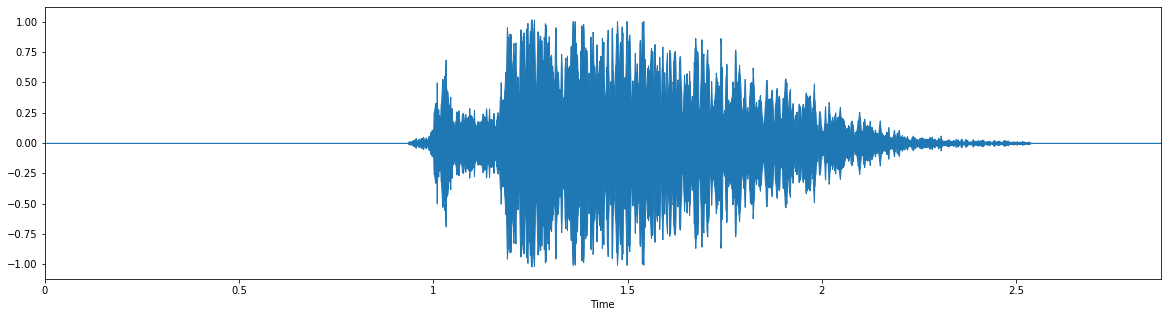

In [24]:
plt.figure(figsize=(20, 5))
librosa.display.waveplot(data, sr=sampling_rate)

In [25]:
pwd

'/Users/himeshnag/Desktop/Code'

In [26]:
x3 = arctan_compressor(x)
x3 = np.int16(x3 * 32767)
wavfile.write("FINAL.wav", sr, x3)

In [27]:
data, sampling_rate = librosa.load("FINAL.wav")

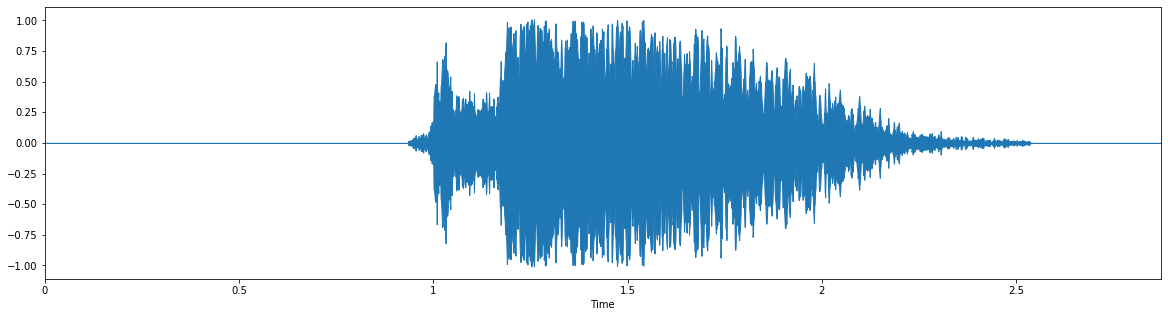

In [28]:
plt.figure(figsize=(20, 5))
librosa.display.waveplot(data, sr=sampling_rate)

In [ ]:
Compare the over all shapes of the Waveforms and it will be very easy to spot the differences

In [ ]:
1.0 is the highest peak i.e. +0.4

In [ ]:
Therefore the system works for all type of audios flawlessly

# THANK YOU